In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from datetime import date
label_encoder = LabelEncoder()

# Reading csv
data = pd.read_csv("MAIN_DATASET_spotify2023.csv")
pd.set_option('display.max_columns', None)
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
948,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
950,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


# Features Preprocessing

In [41]:
# Encoding key and bpm column
data['key'] = label_encoder.fit_transform(data['key'])
data['mode'] = label_encoder.fit_transform(data['mode'])
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [42]:
# transforming year, month and day into specific day of the year
released_day_of_year = []
if 'released_day_of_year' in data.columns:
    pass
else:
    for i in range(len(data.index)):
        day_of_year = date(data['released_year'][i],
                        data['released_month'][i],
                        data['released_day'][i]).timetuple().tm_yday
        released_day_of_year.append(day_of_year)

    data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_day_of_year
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,2,0,80,89,83,31,0,8,4,195
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,3,0,71,61,74,7,0,10,4,82
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,7,0,51,32,53,17,0,31,6,181
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,0,0,55,58,72,11,0,11,15,235
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,0,1,65,23,80,14,63,11,6,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,0,0,60,24,39,57,0,8,3,307
948,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,8,0,42,7,24,83,1,12,6,294
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,3,0,80,81,67,4,0,8,6,307
950,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,3,0,82,67,77,8,0,12,5,293


In [43]:
# Converting the number of streams to be in millions
data["streams"] = data["streams"] / 1000000

In [46]:
# Selecting features we are using
data_dropped = data = data[["released_day_of_year","streams",'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [48]:
data

,released_day_of_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,195,141.381703,125,2,0,80,89,83,31,0,8,4
1,82,133.716286,92,3,0,71,61,74,7,0,10,4
2,181,140.003974,138,7,0,51,32,53,17,0,31,6
3,235,800.840817,170,0,0,55,58,72,11,0,11,15
4,138,303.236322,144,0,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
947,307,91.473363,144,0,0,60,24,39,57,0,8,3
948,294,121.871870,166,8,0,42,7,24,83,1,12,6
949,307,73.513683,92,3,0,80,81,67,4,0,8,6
950,293,133.895612,97,3,0,82,67,77,8,0,12,5


### Outliers

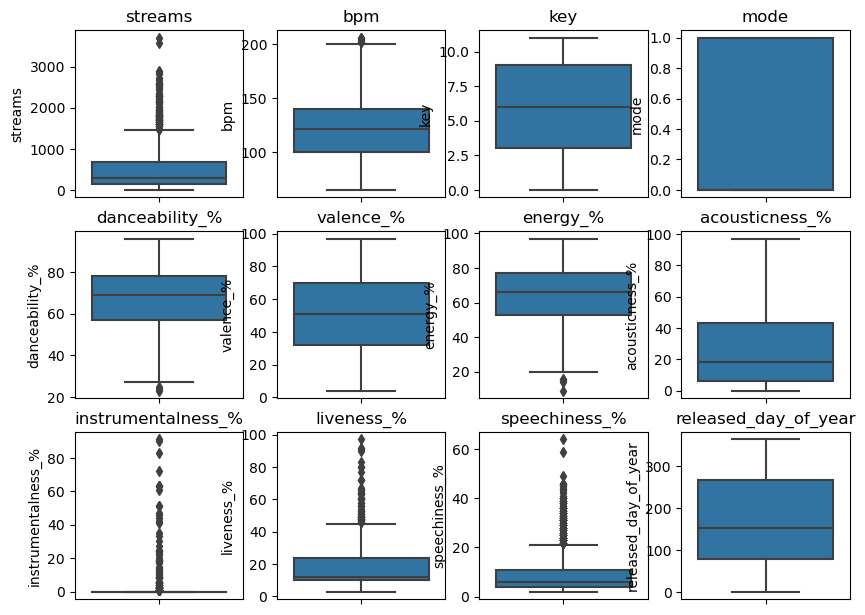

In [47]:
# Looking for outliers

plt.figure(figsize = (10, 10))
i = 1
for col in data_dropped.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y = data_dropped[col])
    plt.title(col)
    i+=1
# We do not assume that outliers in streams are speechiness are outliers to remove. We are using every feature as it is.

Text(0.5, 1.0, 'Speechiness')

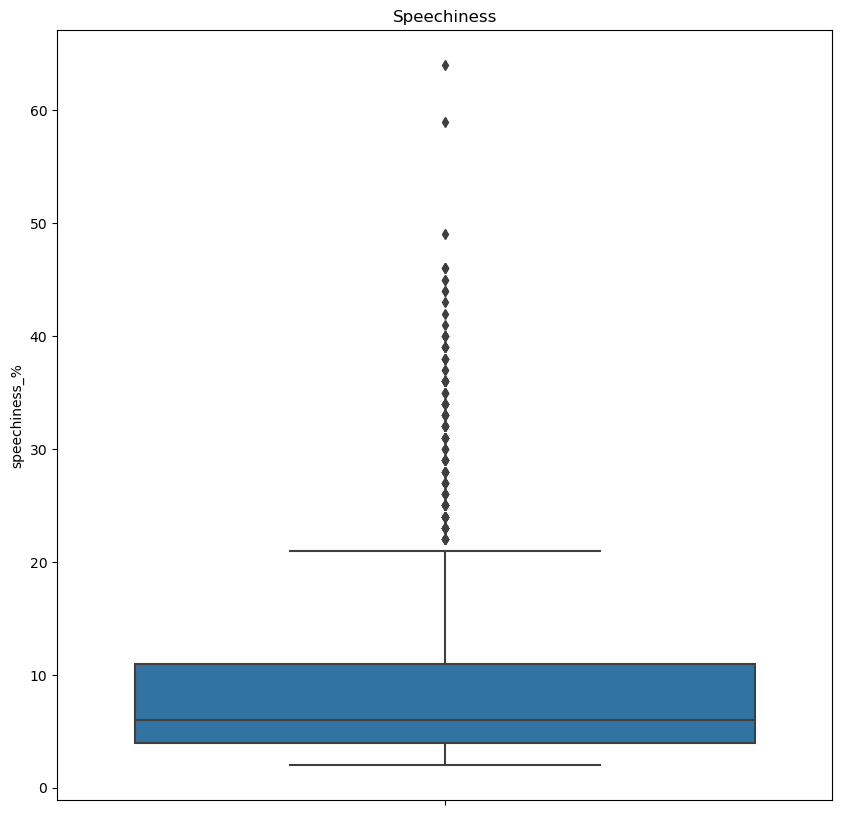

In [7]:
# looking on single feature outliers
plt.figure(figsize = (10, 10))
sns.boxplot(y = data_dropped["speechiness_%"])
plt.title("Speechiness")

In [57]:
# looking at ouliers values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sorted_data = data.sort_values(by="danceability_%")
reset_data = sorted_data.reset_index(drop=True)
reset_data.head(50)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396,73,79,123,0,0,96,A,Major,23,19,25,91,0,40,3
1,It's the Most Wonderful Time of the Year,Andy Williams,1,1963,10,14,8879,0,663832097,182,107,160,0,1,202,G,Major,24,76,60,77,0,12,4
2,Lift Me Up - From Black Panther: Wakanda Forev...,Rihanna,1,2022,10,28,3311,0,297328960,129,31,212,1,41,177,A,Major,25,17,30,90,0,13,3
3,Dawn FM,The Weeknd,1,2022,1,7,811,0,53933526,1,8,6,0,0,78,A,Minor,27,10,49,62,0,49,5
4,"I'm Tired - From ""Euphoria"" An Original HBO Se...",Labrinth,1,2022,2,4,1888,0,121913181,26,1,58,0,0,71,NaN,Minor,28,26,20,19,0,30,3
5,Starry Eyes,The Weeknd,1,2022,1,7,1014,0,74601456,1,17,11,0,0,86,A,Minor,28,13,41,50,0,19,3
6,traitor,"Juan Cruz Toledo, Huilen Toledo",2,2021,5,21,5257,6,1230855859,85,43,134,0,0,176,D#,Major,29,12,33,68,0,12,5
7,Happier Than Ever,Billie Eilish,1,2021,7,30,8476,0,1056760045,138,133,283,0,0,65,NaN,Major,31,31,24,76,0,14,4
8,Notion,The Rare Occasions,1,2016,8,5,2393,0,421135627,22,13,65,0,6,160,A,Major,31,30,88,7,0,8,8
9,Down Under (feat. Colin Hay),"Luude, Colin Hay",2,2021,11,19,3541,2,252871192,57,13,50,1,7,172,B,Minor,31,4,86,1,0,28,17


### Data Stadarization\Normalization

In [45]:
standard_scaler = StandardScaler().set_output(transform="pandas")
minmax_scaler = MinMaxScaler().set_output(transform="pandas")

data_standardized = standard_scaler.fit_transform(data_dropped)
data_normalized = minmax_scaler.fit_transform(data_dropped)


In [44]:
data_dropped.columns

Index(['streams', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%'],
      dtype='object')

### Splitting the data

In [45]:
X = data.drop("streams", axis = 1)
y = data["streams"]

X_train, X_help, y_train, y_help = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_help, y_help, test_size=0.5, random_state=42)


val_percent = (len(X_val)/(len(data)))*100
test_percent = (len(X_test)/(len(data)))*100
train_percent = (len(X_train)/(len(data)))*100
print(f"Percent of Train: {train_percent:.2f} ,Validation:{val_percent:.2f} and Test dataset:{test_percent:.2f} ")


Percent of Train: 59.98 ,Validation:19.96 and Test dataset:20.06 


### Training regression model

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

ValueError: could not convert string to float: 'Cigarettes'

In [96]:
rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
rmse

564086981.8928415

In [97]:
mean = mean_squared_error(y_train, y_pred_train)
mean

3.181941231409748e+17